In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

데이터 준비

In [99]:
mrDF=pd.read_csv('mushrooms.csv')

In [100]:
mrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

결측치확인

In [101]:
features={}
for col in mrDF.columns:
    print(f' {col} {mrDF[col].unique()}')
    features[col]=mrDF[col].unique()

 class ['p' 'e']
 cap-shape ['x' 'b' 's' 'f' 'k' 'c']
 cap-surface ['s' 'y' 'f' 'g']
 cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
 bruises ['t' 'f']
 odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
 gill-attachment ['f' 'a']
 gill-spacing ['c' 'w']
 gill-size ['n' 'b']
 gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 stalk-shape ['e' 't']
 stalk-root ['e' 'c' 'b' 'r' '?']
 stalk-surface-above-ring ['s' 'f' 'k' 'y']
 stalk-surface-below-ring ['s' 'f' 'y' 'k']
 stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 veil-type ['p']
 veil-color ['w' 'n' 'o' 'y']
 ring-number ['o' 't' 'n']
 ring-type ['p' 'e' 'l' 'f' 'n']
 spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 population ['s' 'n' 'a' 'v' 'y' 'c']
 habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [102]:
features

{'class': array(['p', 'e'], dtype=object),
 'cap-shape': array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 'cap-surface': array(['s', 'y', 'f', 'g'], dtype=object),
 'cap-color': array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 'bruises': array(['t', 'f'], dtype=object),
 'odor': array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 'gill-attachment': array(['f', 'a'], dtype=object),
 'gill-spacing': array(['c', 'w'], dtype=object),
 'gill-size': array(['n', 'b'], dtype=object),
 'gill-color': array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 'stalk-shape': array(['e', 't'], dtype=object),
 'stalk-root': array(['e', 'c', 'b', 'r', '?'], dtype=object),
 'stalk-surface-above-ring': array(['s', 'f', 'k', 'y'], dtype=object),
 'stalk-surface-below-ring': array(['s', 'f', 'y', 'k'], dtype=object),
 'stalk-color-above-ring': array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 'stalk-color-be

stalk_root 에 ? 존재!

In [103]:
mrDF['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

?를...일단.. 제거?

In [104]:
mrDF['stalk-root'].replace('?',np.NaN,inplace=True)
mrDF.dropna(inplace=True)
mrDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5644 non-null   object
 1   cap-shape                 5644 non-null   object
 2   cap-surface               5644 non-null   object
 3   cap-color                 5644 non-null   object
 4   bruises                   5644 non-null   object
 5   odor                      5644 non-null   object
 6   gill-attachment           5644 non-null   object
 7   gill-spacing              5644 non-null   object
 8   gill-size                 5644 non-null   object
 9   gill-color                5644 non-null   object
 10  stalk-shape               5644 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  5644 non-null   object
 13  stalk-surface-below-ring  5644 non-null   object
 14  stalk-color-above-ring    564

In [105]:
# 중복값
mrDF.duplicated().sum()

0

피쳐 타겟 분리

In [106]:
targetSR=mrDF['class']
featureDF=mrDF.drop(columns='class')
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 0 to 8114
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 5644 non-null   object
 1   cap-surface               5644 non-null   object
 2   cap-color                 5644 non-null   object
 3   bruises                   5644 non-null   object
 4   odor                      5644 non-null   object
 5   gill-attachment           5644 non-null   object
 6   gill-spacing              5644 non-null   object
 7   gill-size                 5644 non-null   object
 8   gill-color                5644 non-null   object
 9   stalk-shape               5644 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  5644 non-null   object
 12  stalk-surface-below-ring  5644 non-null   object
 13  stalk-color-above-ring    5644 non-null   object
 14  stalk-color-below-ring    564

인코딩

In [107]:
# encoder=LabelEncoder()
# for col in featureDF.columns:
#     featureDF[col]=encoder.fit_transform(featureDF[col])

# featureDF

In [108]:
# encoder=OneHotEncoder(sparse_output=False)
# featureDF=encoder.fit_transform(featureDF)


In [109]:
featureDF_encoded=pd.get_dummies(featureDF)

In [110]:
featureDF_encoded

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,True,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8001,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8038,False,False,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
8095,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


데이터셋분리

In [111]:
X_train,X_test,y_train,y_test=train_test_split(featureDF_encoded,targetSR,stratify=targetSR,random_state=0)

In [112]:
group=targetSR.groupby(y_train)

class
e    Axes(0.125,0.11;0.775x0.77)
p    Axes(0.125,0.11;0.775x0.77)
Name: class, dtype: object

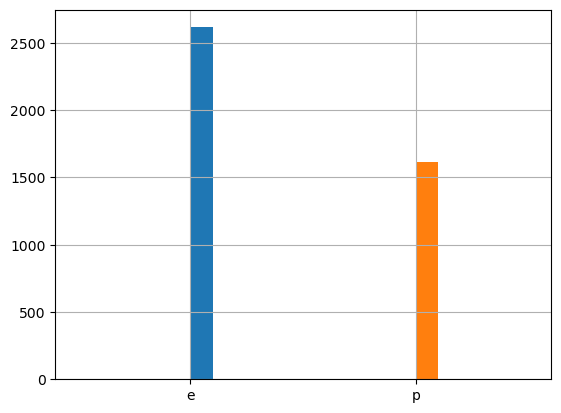

In [113]:
group.hist()

In [120]:
e_idx=group.groups['e']
e_featureDF=featureDF.loc[e_idx.to_list()]
p_idx=group.groups['p']
p_featureDF=featureDF.loc[p_idx.to_list()]

In [ ]:
import matplotlib.pyplot as plt

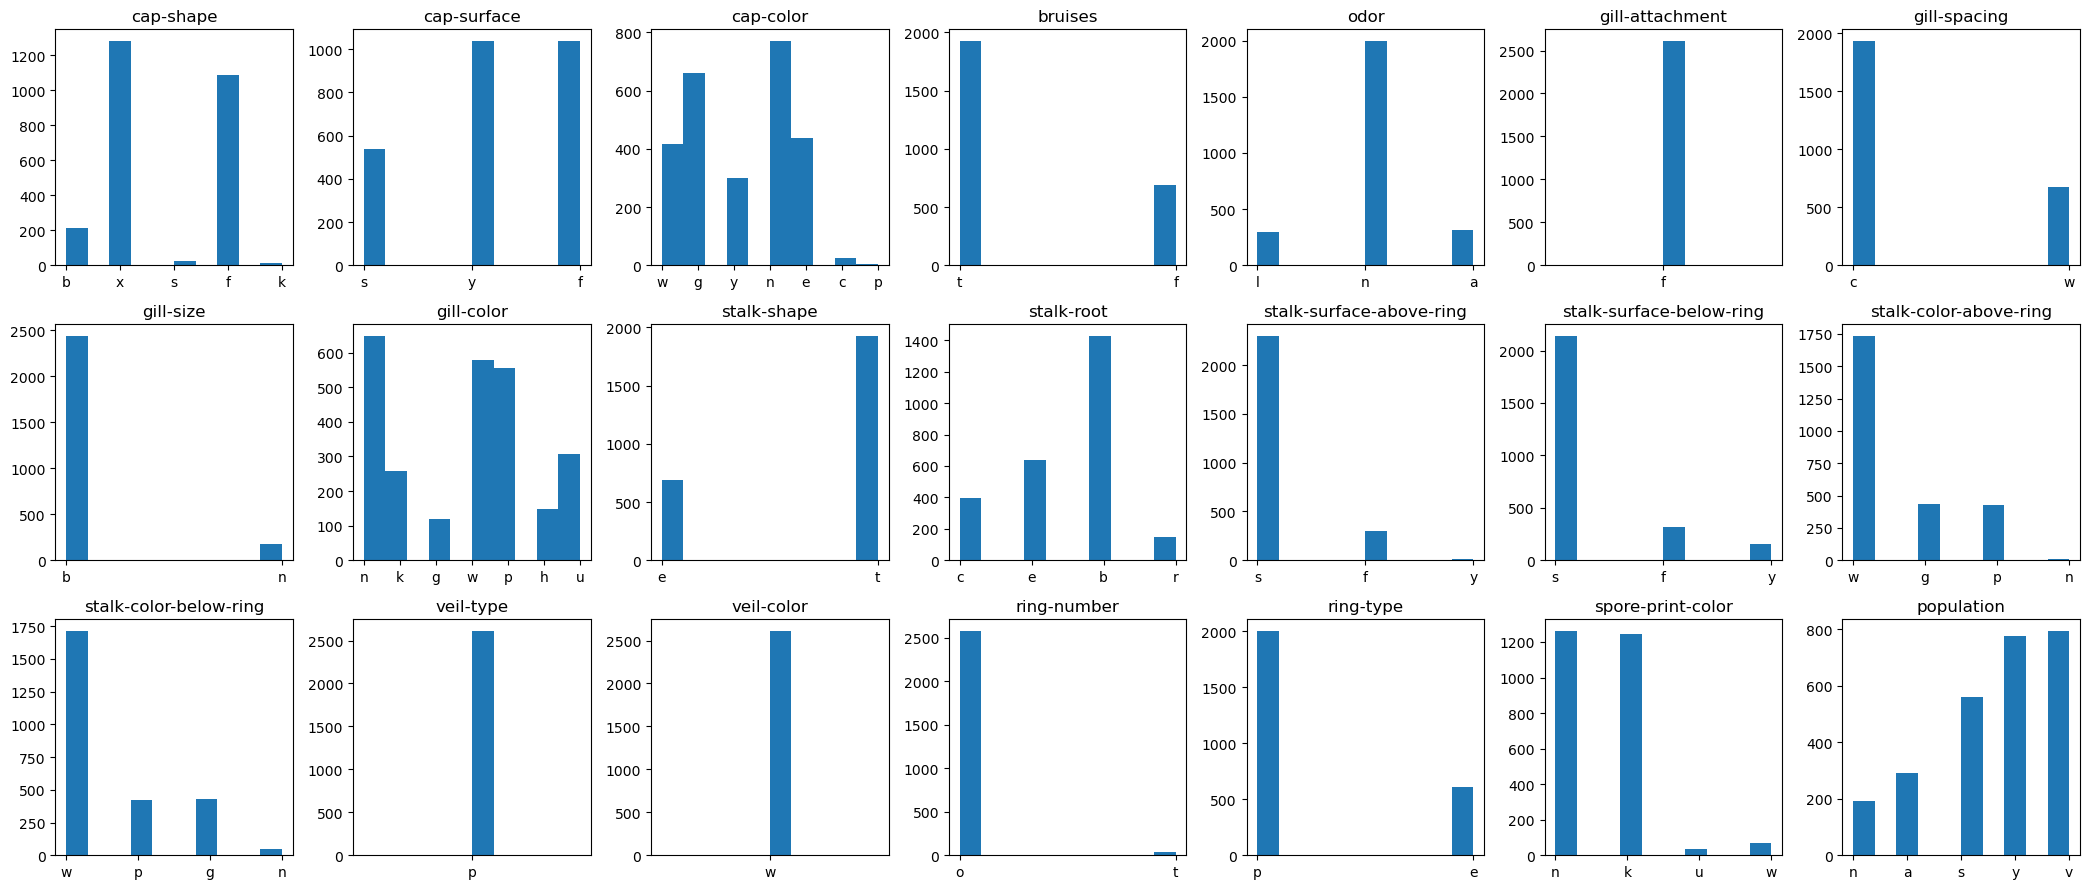

In [139]:
# 식용버섯
fig,ax=plt.subplots(figsize=(21,9),ncols=7,nrows=3)
for i in range(21):
    ax[i//7,i%7].hist(e_featureDF[e_featureDF.columns[i]])
    ax[i//7,i%7].set_title(e_featureDF.columns[i])

plt.tight_layout()
plt.show()


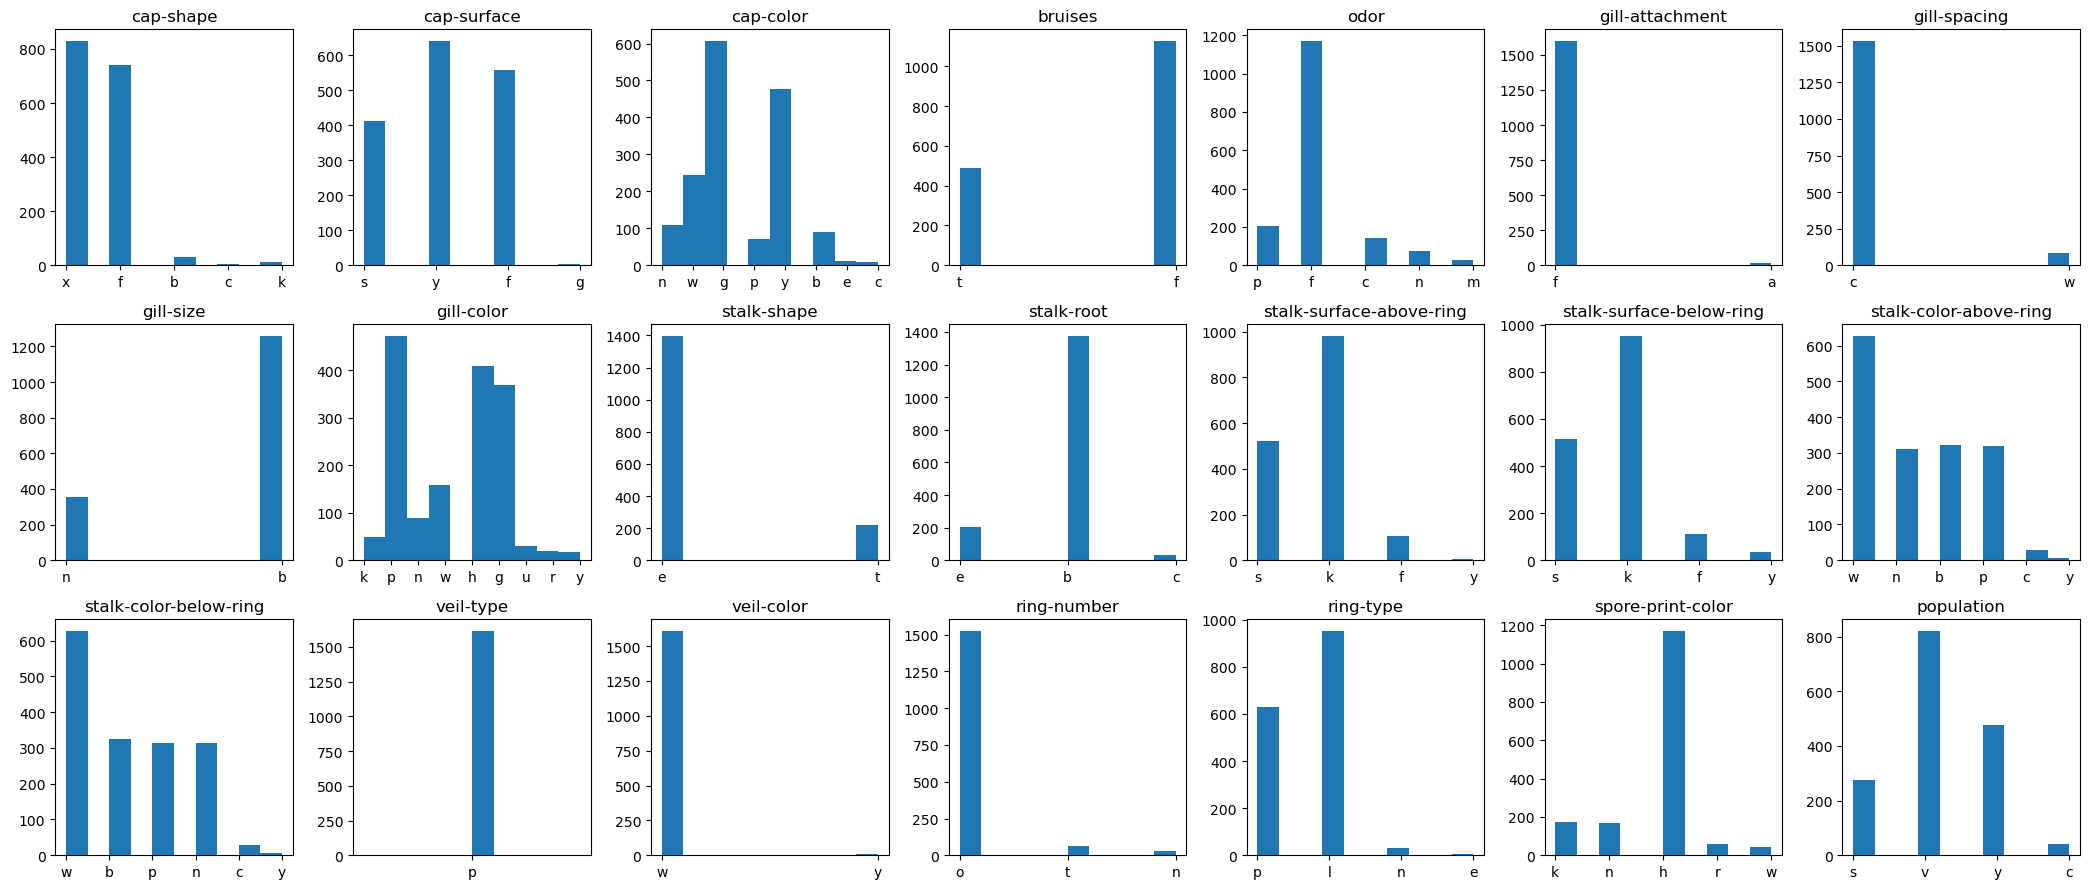

In [140]:
# 독버섯
fig,ax=plt.subplots(figsize=(21,9),ncols=7,nrows=3)
for i in range(21):
    ax[i//7,i%7].hist(p_featureDF[p_featureDF.columns[i]])
    ax[i//7,i%7].set_title(p_featureDF.columns[i])

plt.tight_layout()
plt.show()

## value count 해서 두개 한번에 그리기

In [190]:
p=p_featureDF['gill-color'].value_counts().to_frame()
p.columns=['p']
e=e_featureDF['gill-color'].value_counts().to_frame()
e.columns=['e']df
=p.join(e,how='outer')

,p,e
gill-color,,
g,368,120.0
h,409,149.0
k,50,257.0
n,90,649.0
p,473,556.0
r,20,NaN
u,31,306.0
w,158,579.0
y,18,NaN


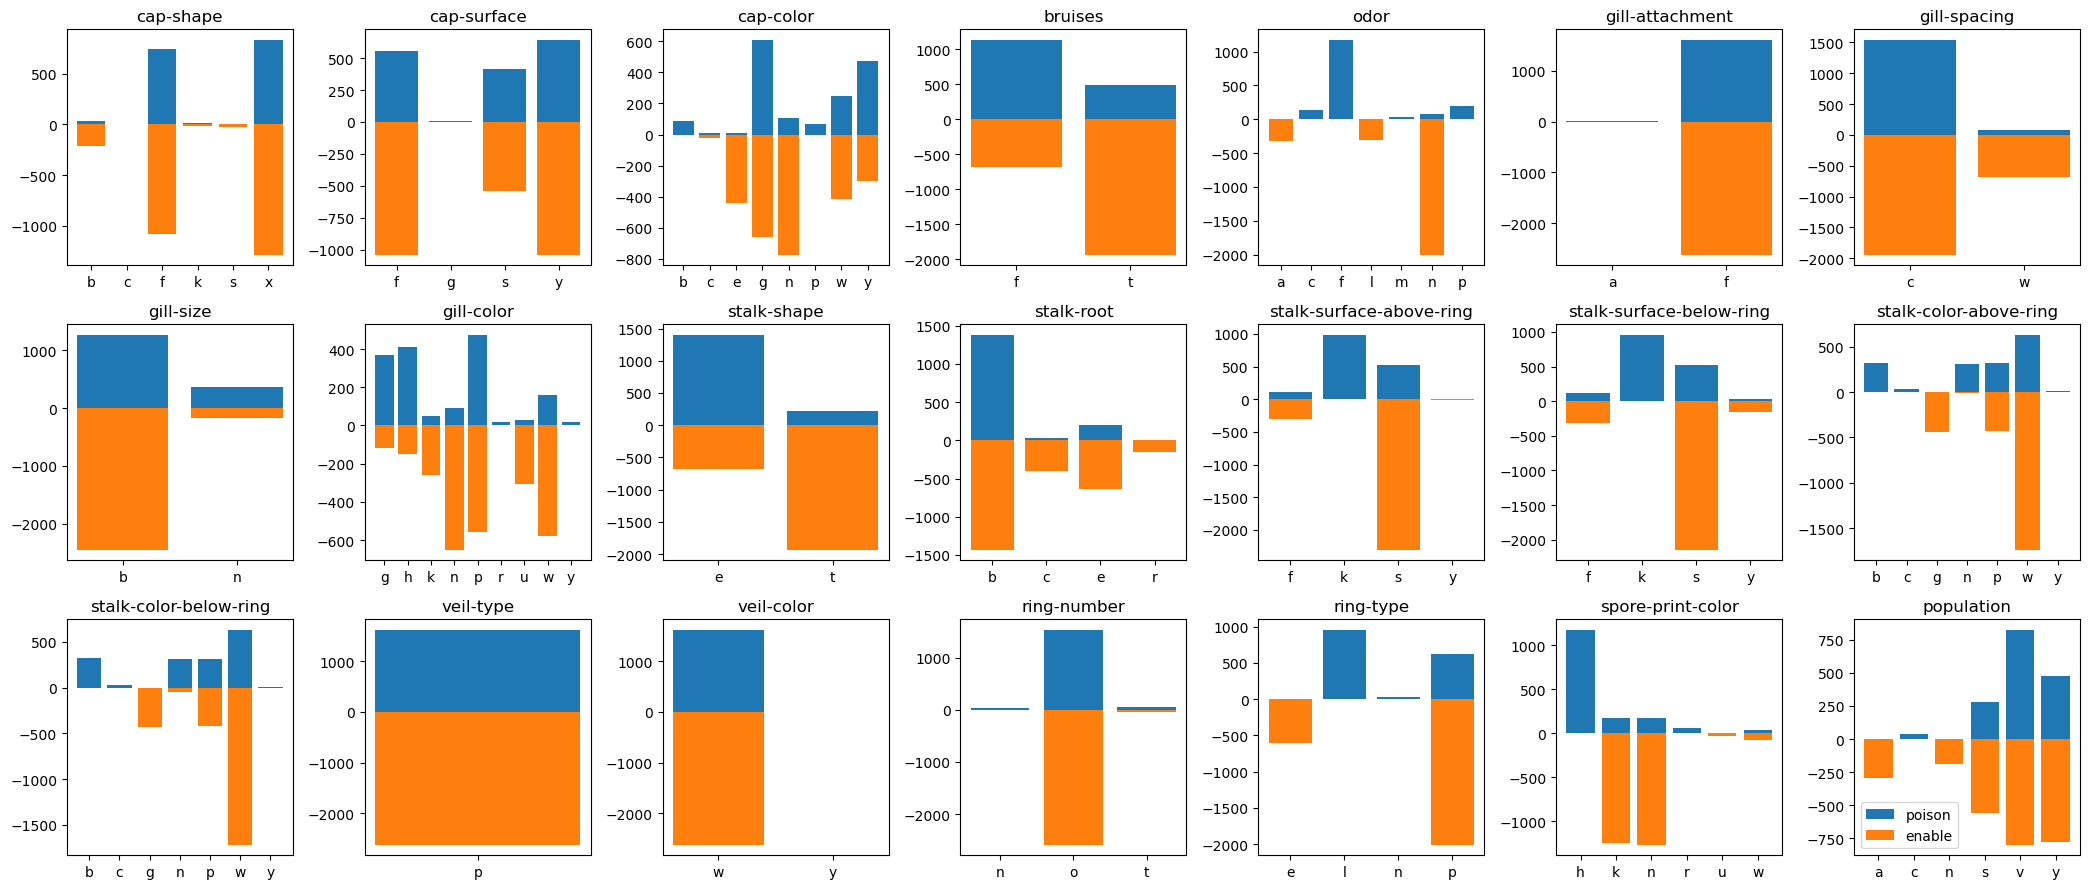

In [195]:
# 독버섯
fig,ax=plt.subplots(figsize=(21,9),ncols=7,nrows=3)
for i in range(21):
    p=p_featureDF[p_featureDF.columns[i]].value_counts().to_frame()
    p.columns=['p']
    e=e_featureDF[e_featureDF.columns[i]].value_counts().to_frame()
    e.columns=['e']
    df=p.join(e,how='outer')
    ax[i//7,i%7].bar(df.index,df['p'],label='poison')
    ax[i//7,i%7].bar(df.index,-1* df['e'],label='enable')
    ax[i//7,i%7].set_title(p_featureDF.columns[i])
plt.legend()
plt.tight_layout()
plt.show()

DecisionTreeClassfier

학습진행 -
- VotingClassfier
    - LogisticRegression
    - DecisionTreeClassfier

In [ ]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()

logisticRegression


In [ ]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_model.coef_

array([[ 3.71581328e-03,  3.77384463e-01,  6.85320222e-02,
         8.56205254e-02, -5.20136805e-01, -1.51734537e-02,
        -9.70467970e-01,  4.42582259e-01,  3.81367286e-01,
         1.46460989e-01,  8.92931715e-01, -6.12499757e-01,
        -2.43311840e-01, -2.88176192e-02, -6.07211094e-01,
         7.29803324e-01,  3.69002201e-01, -4.99954364e-01,
        -7.26032316e-02,  7.25457961e-02, -2.46768968e+00,
         2.25760146e+00,  2.34038691e+00, -2.43154024e+00,
         4.08431201e-01, -2.84727700e+00,  2.74002990e+00,
         1.83053417e-01, -1.83110853e-01,  3.63206782e-01,
        -3.63264218e-01, -1.36758167e+00,  1.36752423e+00,
         4.18172048e-03,  4.11640039e-01, -3.70654621e-01,
        -3.82948377e-01, -9.46442580e-02,  4.57723432e-01,
         9.64747846e-02, -4.17269895e-01,  2.95439739e-01,
         1.40843430e+00, -1.40849174e+00,  1.81744186e+00,
        -1.32475652e+00,  2.54545073e-01, -7.47287854e-01,
        -3.42234558e-01,  1.02791799e+00, -9.99414655e-0

In [ ]:
lr_model.score(X_train,y_train)

1.0

In [ ]:
lr_model.score(X_test,y_test)

1.0

LogisticRegression cross_validate

In [ ]:
cross_validate(lr_model,X_train,y_train)

{'fit_time': array([0.03567052, 0.03890848, 0.02366519, 0.02615809, 0.02988791]),
 'score_time': array([0.00303936, 0.00324559, 0.0040524 , 0.00304389, 0.00311756]),
 'test_score': array([1., 1., 1., 1., 1.])}

DecisionTreeClassfier

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_model.score(X_train,y_train)

1.0

In [ ]:
dt_model.score(X_test,y_test)

1.0

In [ ]:
y_train.value_counts()

class
e    2616
p    1617
Name: count, dtype: int64

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_model,out_file='tree.dot',class_names=['enable','poison'],
                feature_names=featureDF.columns,impurity=True,filled=True,
                rounded=True, # 동글동글
                )

ValueError: Length of feature_names, 22 does not match number of features, 98

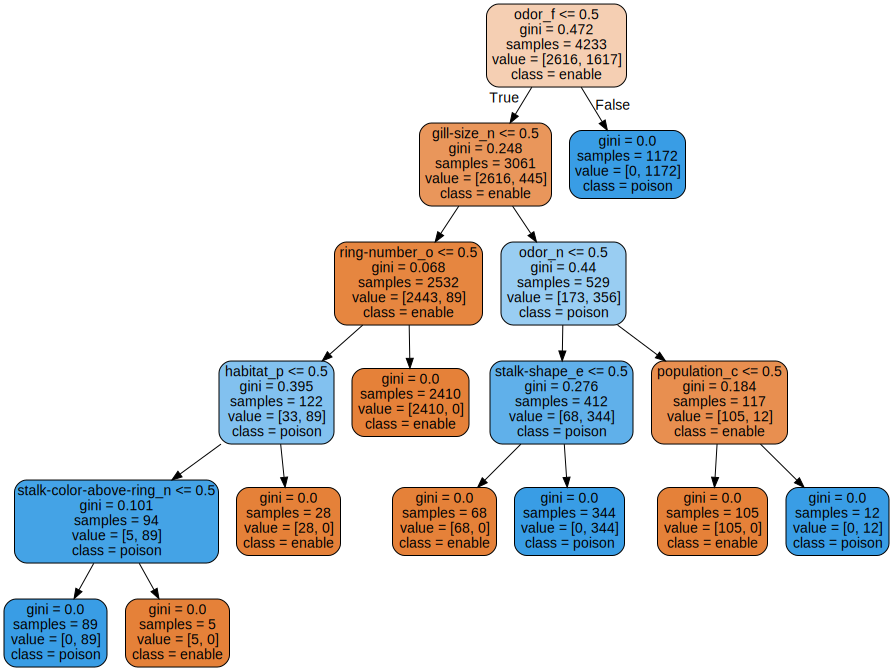

In [ ]:
##(2) dot 파일 출력
import graphviz

# 파일데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

In [ ]:
cross_validate(dt_model,X_train,y_train)

{'fit_time': array([0.01124692, 0.00995851, 0.0089674 , 0.00990796, 0.00995708]),
 'score_time': array([0.00299001, 0.00300264, 0.00304675, 0.00299096, 0.00299883]),
 'test_score': array([1., 1., 1., 1., 1.])}

VotingClassifier

In [ ]:
vh_model=VotingClassifier(estimators=[('lr_model',lr_model),('dt_model',dt_model)],voting='hard')
vs_model=VotingClassifier(estimators=[('lr_model',lr_model),('dt_model',dt_model)],voting='soft')


In [ ]:
vh_model.fit(X_train,y_train)
vs_model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression()),
                             ('dt_model', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
hard_train_score=vh_model.score(X_train,y_train)
hard_test_score=vh_model.score(X_test,y_test)

soft_train_score=vs_model.score(X_train,y_train)
soft_test_score=vs_model.score(X_test,y_test)

In [ ]:
print(F'hard_train_score : hard_test_score = {hard_train_score} : {hard_test_score}')

print(F'soft_train_score : soft_test_score = {soft_train_score} : {soft_test_score}')

hard_train_score : hard_test_score = 1.0 : 1.0
soft_train_score : soft_test_score = 1.0 : 1.0


## 중요도낮은 피쳐를 줄여볼것
## 독성과 아닌것을 찾아서 히스토그램으로 확인해서 중요도 확인해볼것!

In [ ]:
featureDF.columns
# 모아서 해보기!

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a',
       'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-

In [ ]:
vs_model.get_params()

{'estimators': [('lr_model', LogisticRegression()),
  ('dt_model', DecisionTreeClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'lr_model': LogisticRegression(),
 'dt_model': DecisionTreeClassifier(),
 'lr_model__C': 1.0,
 'lr_model__class_weight': None,
 'lr_model__dual': False,
 'lr_model__fit_intercept': True,
 'lr_model__intercept_scaling': 1,
 'lr_model__l1_ratio': None,
 'lr_model__max_iter': 100,
 'lr_model__multi_class': 'auto',
 'lr_model__n_jobs': None,
 'lr_model__penalty': 'l2',
 'lr_model__random_state': None,
 'lr_model__solver': 'lbfgs',
 'lr_model__tol': 0.0001,
 'lr_model__verbose': 0,
 'lr_model__warm_start': False,
 'dt_model__ccp_alpha': 0.0,
 'dt_model__class_weight': None,
 'dt_model__criterion': 'gini',
 'dt_model__max_depth': None,
 'dt_model__max_features': None,
 'dt_model__max_leaf_nodes': None,
 'dt_model__min_impurity_decrease': 0.0,
 'dt_model__min_samples_leaf': 1,
 'dt_model__min_sample